<a href="https://colab.research.google.com/github/nilesh0109/ML_SoSe19/blob/master/ML_ex07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [0]:
class K_Arm_Bandit:
  def __init__(self, num_arms, num_episodes=1, num_games_per_episode=1000):
    self.k = num_arms
    #num of games in a episode say 1000 in this assigment
    self.num_games = num_games_per_episode
    self.num_episodes = num_episodes
    self.a = np.arange(self.k, dtype=np.int32)
    self.N_a = np.zeros((self.num_episodes, self.k), dtype=np.int32)
    self.Q = np.zeros(self.k, dtype=np.float32)
    self.optimal_action = np.zeros((self.num_episodes, self.num_games), dtype=np.int32)
    self.chosen_action = np.zeros((self.num_episodes, self.num_games), dtype=np.int32)
    self.isOptimalActionChosen = np.zeros((self.num_episodes, self.num_games), dtype=np.float32)
    self.rewards = np.zeros((self.num_episodes, self.num_games))
    self.reset()
  
  def reset(self):
    '''This r_dist_means gives us the mean of the Normal reward distribution which is in itself comes from a Normal distrubition with zero mean'''
    self.r_dist_means = np.random.normal(size=10)
  
  def getReward(self, act, episode_ind, game_ind):
    '''Storing the optimal actions for the sake of plots'''
    rewards_for_each_actions = [np.random.normal(reward_mean) for reward_mean in self.r_dist_means]
    self.optimal_action[episode_ind, game_ind]= np.argmax(rewards_for_each_actions)
    ''' Fetches the reward from a normal distribution given the action index'''
    self.rewards[episode_ind, game_ind] = rewards_for_each_actions[act]
    if self.optimal_action[episode_ind, game_ind] == act:
      self.isOptimalActionChosen[episode_ind, game_ind] = 1
  
  def play_epsilon_greedy(self, epsilon):
    p = np.random.random()
    if p > epsilon:
      chosen_action = np.argmax(self.Q)
    else:
      chosen_action = np.random.choice(self.a)
    return chosen_action
  
  def play(self, eps=0.1):
    for episode in range(self.num_episodes):
      self.reset()
      self.run_episode(episode, eps)
  
  def run_episode(self, episode, eps):
    for game in range(self.num_games):
      next_action = self.play_epsilon_greedy(eps)
      self.step(next_action, episode, game)
  
  def step(self, act, episode_ind, game_ind):
    self.N_a[episode_ind, act] += 1
    self.getReward(act, episode_ind, game_ind)
    self.chosen_action[episode_ind, game_ind] = act
    self.Q[act] +=  (1 / self.N_a[episode_ind, act]) * (self.rewards[episode_ind, game_ind] - self.Q[act])
          

In [3]:
testBed = K_Arm_Bandit(10,num_episodes=100, num_games_per_episode)
testBed.play()
print(testBed.isOptimalActionChosen)
np.max(testBed.isOptimalActionChosen.mean(axis=0) * 100)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


0.000000 done
0.099976 done
0.010002 done
0.009003 done


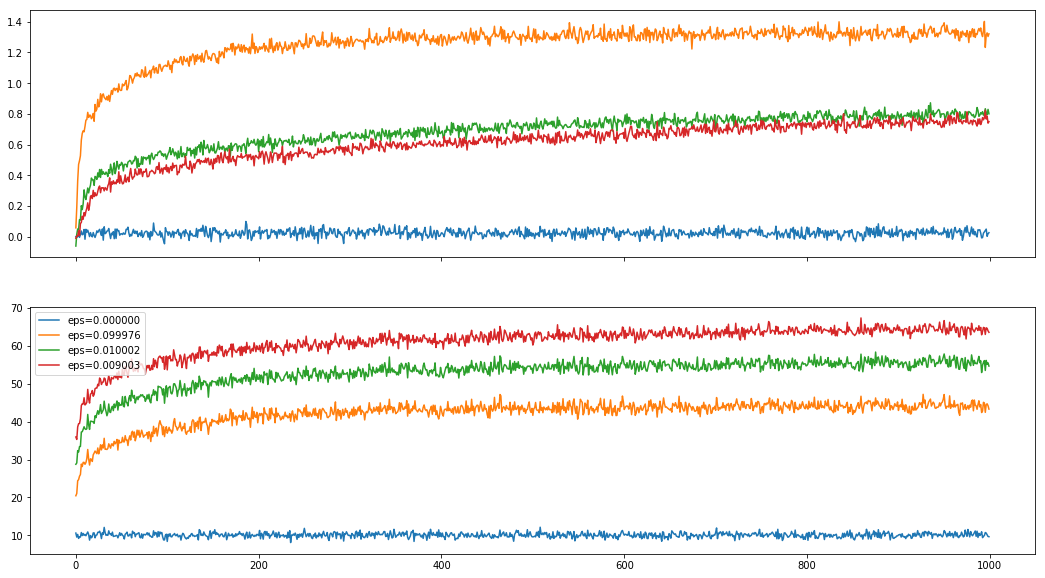

In [5]:
fig, (ax1,ax2) = plt.subplots(2, 1, sharex=True, figsize=(18,10))
try_eps = np.array([0, 0.1, 0.01, 0.009], dtype=np.float16)
testBed = K_Arm_Bandit(10,num_episodes=2000)
for eps in try_eps:
  testBed.play(eps)
  num_episodes, num_games_per_episode = testBed.rewards.shape
  ax1.plot(np.arange(num_games_per_episode),np.mean(testBed.rewards, axis=0), label='eps={:f}'.format(eps))
  ax2.plot(np.arange(num_games_per_episode),np.mean(testBed.isOptimalActionChosen, axis=0)*100, label='eps={:f}'.format(eps))
  
  print('{:f} done'.format(eps))
ax1.set_title('Avg Reward for {:d} steps'.format(num_games_per_episode))
ax2.set_title('% optimal actions for {:d} steps'.format(num_games_per_episode))
plt.legend()

In [0]:
fig, (ax1,ax2) = plt.subplots(2, 1, sharex=True, figsize=(18,10))
try_eps = np.array([0, 0.1, 0.01, 0.009], dtype=np.float16)
testBed = K_Arm_Bandit(10,num_episodes=10000)
for eps in try_eps:
  testBed.play(eps)
  num_episodes, num_games_per_episode = testBed.rewards.shape
  ax1.plot(np.arange(num_games_per_episode),np.mean(testBed.rewards, axis=0), label='eps={:f}'.format(eps))
  ax2.plot(np.arange(num_games_per_episode),np.mean(testBed.isOptimalActionChosen, axis=0)*100, label='eps={:f}'.format(eps))
  
  print('{:f} done'.format(eps))
ax1.set_title('Avg Reward for {:d} steps'.format(num_games_per_episode))
ax2.set_title('% optimal actions for {:d} steps'.format(num_games_per_episode))
plt.legend()

0.000000 done
